In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install --upgrade gspread pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 114.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import gspread
import pandas as pd

In [4]:

# Replace with the CSV export link of your Google Sheet
csv_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT2NrIv3m3eKRW8DsAvgOZjvueVpgKNgHy-cNKEUE0HOwsrmN_Jy6PDWiLU0HwxfaCYj7sFVBZjlr8Y/pub?gid=0&single=true&output=csv'

# Read the Google Sheet into a pandas DataFrame
df1 = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df1)


                     time  AccX  AccY  AccZ  GyroX  GyroY  GyroZ   Temp  \
0     04/10/2024 17:50:19 -9.00 -2.78  1.30   0.00  -0.34  -0.03  33.45   
1     04/10/2024 17:50:33 -8.40 -3.56  1.83  -0.04   0.02   0.00  34.07   
2     04/10/2024 17:50:47 -8.69 -2.40  2.20  -0.03  -0.02   0.00  34.47   
3     04/10/2024 17:51:01 -8.90 -2.15  1.99   0.01   0.08   0.04  35.37   
4     04/10/2024 17:51:16 -8.61 -2.41  2.45   0.02  -0.02   0.01  36.09   
...                   ...   ...   ...   ...    ...    ...    ...    ...   
6875  11/10/2024 02:50:38  1.35 -4.74  7.68  -0.02  -0.01  -0.02  26.94   
6876  11/10/2024 02:50:53  1.34 -4.74  7.64  -0.02  -0.01  -0.02  26.96   
6877  11/10/2024 02:51:08  1.33 -4.72  7.64  -0.02  -0.01  -0.02  26.92   
6878  11/10/2024 02:51:23  1.33 -4.75  7.66  -0.02  -0.01  -0.02  26.82   
6879  11/10/2024 02:51:35  0.48 -4.67  8.51  -0.05   0.02   0.04  26.72   

       Latitude  Longitude  
0     29.867373  77.901810  
1     29.867373  77.901810  
2     29.867

In [5]:
df1.columns

Index(['time', 'AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Temp',
       'Latitude', 'Longitude'],
      dtype='object')

In [6]:
import numpy as np
import pandas as pd
def detect_anomaly(column_string):
  count = 0
  mu_accx= np.mean(df1[column_string])
  std_accx= np.std(df1[column_string])
  print("mean is", mu_accx)
  print("standard deviation is", std_accx)
  for val in df1[column_string]:
    row_no = df1.index[df1[column_string]== val].tolist()
    row= row_no[0]
    if(val< mu_accx - 2*std_accx or val> mu_accx + 2*std_accx):
      print("anomaly is present in this row no.-", row+2)
      count+=1
    else:
      pass
  print(count)

In [7]:
nf = df1.copy()
nf = nf.drop(columns=['time'])
nf = nf.drop(columns=['Latitude'])
nf = nf.drop(columns=['Longitude'])
nf = nf.drop(columns=['Temp'])

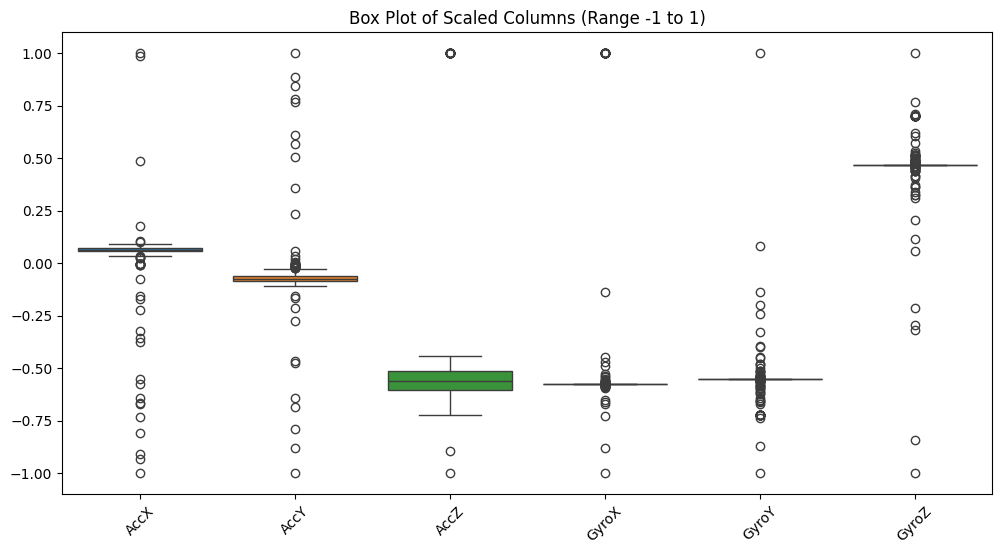

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def plot_minmax_scaled_boxplots(df):
    # Scaling the data to range [-1, 1]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(df)

    # Convert the scaled data back into a DataFrame for plotting
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

    # Create box plots of the scaled data
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    sns.boxplot(data=scaled_df)
    plt.xticks(rotation=45)  # Rotate column names for better readability
    plt.title("Box Plot of Scaled Columns (Range -1 to 1)")
    plt.show()

# Example usage:
# df = pd.DataFrame(...)  # Your DataFrame here
plot_minmax_scaled_boxplots(nf)


In [9]:
import numpy as np
import pandas as pd

def detect_anomalies(df):
    anomaly_rows = set()  # Set to track rows with anomalies
    count = 0  # Total anomaly count

    for column in df.columns:  # Iterate over all columns
        mu = np.mean(df[column])
        std = np.std(df[column])
        print(f"Column: {column}, Mean: {mu}, Standard Deviation: {std}")

        for val in df[column]:
            row_no = df.index[df[column] == val].tolist()
            row = row_no[0]

            # Check if the value is outside the 2*std deviation range
            if (val < mu - 2 * std or val > mu + 2 * std):
                # Only count anomaly once per row
                if row not in anomaly_rows:
                    anomaly_rows.add(row)
                    print(f"Anomaly detected at Row {row + 2} in column '{column}', Value: {val}")
                    count += 1
            else:
                pass

    print("Total anomalies detected:", count)

In [10]:
detect_anomalies(nf)

Column: AccX, Mean: 0.05977034883720947, Standard Deviation: 4.745679286986765
Anomaly detected at Row 46 in column 'AccX', Value: -77.28
Anomaly detected at Row 1940 in column 'AccX', Value: -55.19
Anomaly detected at Row 1941 in column 'AccX', Value: -92.17
Anomaly detected at Row 1942 in column 'AccX', Value: -124.91
Anomaly detected at Row 1943 in column 'AccX', Value: 115.83
Anomaly detected at Row 1944 in column 'AccX', Value: -88.64
Anomaly detected at Row 1946 in column 'AccX', Value: -48.69
Anomaly detected at Row 2164 in column 'AccX', Value: -17.39
Anomaly detected at Row 2165 in column 'AccX', Value: -133.48
Anomaly detected at Row 2167 in column 'AccX', Value: -109.4
Anomaly detected at Row 2173 in column 'AccX', Value: -79.9
Anomaly detected at Row 3163 in column 'AccX', Value: 53.11
Anomaly detected at Row 3165 in column 'AccX', Value: 117.31
Anomaly detected at Row 3166 in column 'AccX', Value: -121.95
Anomaly detected at Row 3168 in column 'AccX', Value: -99.82
Anomaly

In [11]:
detect_anomaly("AccY")

mean is -6.826870639534883
standard deviation is 5.720764703885391
anomaly is present in this row no.- 17
anomaly is present in this row no.- 46
anomaly is present in this row no.- 1940
anomaly is present in this row no.- 1941
anomaly is present in this row no.- 1942
anomaly is present in this row no.- 1943
anomaly is present in this row no.- 1944
anomaly is present in this row no.- 1946
anomaly is present in this row no.- 2164
anomaly is present in this row no.- 2165
anomaly is present in this row no.- 2167
anomaly is present in this row no.- 3163
anomaly is present in this row no.- 3164
anomaly is present in this row no.- 3165
anomaly is present in this row no.- 3166
anomaly is present in this row no.- 3167
anomaly is present in this row no.- 3168
anomaly is present in this row no.- 3169
anomaly is present in this row no.- 3170
anomaly is present in this row no.- 3171
anomaly is present in this row no.- 3284
anomaly is present in this row no.- 4596
anomaly is present in this row no.-

In [12]:
detect_anomaly("AccX")


mean is 0.05977034883720947
standard deviation is 4.745679286986765
anomaly is present in this row no.- 46
anomaly is present in this row no.- 1940
anomaly is present in this row no.- 1941
anomaly is present in this row no.- 1942
anomaly is present in this row no.- 1943
anomaly is present in this row no.- 1944
anomaly is present in this row no.- 1946
anomaly is present in this row no.- 2164
anomaly is present in this row no.- 2165
anomaly is present in this row no.- 2167
anomaly is present in this row no.- 2173
anomaly is present in this row no.- 3163
anomaly is present in this row no.- 3165
anomaly is present in this row no.- 3166
anomaly is present in this row no.- 3168
anomaly is present in this row no.- 3169
anomaly is present in this row no.- 3170
anomaly is present in this row no.- 3171
anomaly is present in this row no.- 4596
anomaly is present in this row no.- 4818
anomaly is present in this row no.- 5022
21


In [14]:
import pandas as pd
import numpy as np
from google.oauth2 import service_account
from googleapiclient.discovery import build
from sklearn.preprocessing import MinMaxScaler

# Function to read data from Google Sheets
def fetch_data_from_google_sheets(sheet_id):
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
    SERVICE_ACCOUNT_FILE = '/content/authentic-ether-438511-g0-1f4777f1e7d8.json'  # Add your Google API credentials file here

    credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    service = build('sheets', 'v4', credentials=credentials)
    sheet = service.spreadsheets()

    # Fetch data from the entire sheet by specifying just the sheet name
    sheet_range = 'Sheet1'  # Get all data from Sheet1
    result = sheet.values().get(spreadsheetId=sheet_id, range=sheet_range).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
        return None  # Return None if no data is found
    else:
        df = pd.DataFrame(values[1:], columns=values[0])  # Create DataFrame using first row as header
        return df

# Example usage
sheet_id1 = '1ATvo4cnVuxSlhGiJZUE4tIh-NCDUD_1AvI511f5vZBU'  # Replace with your Google Sheets ID
df1 = fetch_data_from_google_sheets(sheet_id1)
sheet_id2 = '1AAhn_PEXCgodW1nTxzho8V-3dUt6gxA0nN9ANmnyQy8'  # Replace with your Google Sheets ID
df2 = fetch_data_from_google_sheets(sheet_id2)
sheet_id3= '1ZNzp7X3n8CkrgQbqVauzQ7M4MFo9jE4D7w9Ydgcm2Rk'
df3 = fetch_data_from_google_sheets(sheet_id3)
sheet_id4='1Q8fjbs-joMjJJIaPmwmEUORiH5T6-BpEQMHXU8ilgtM'
df4 = fetch_data_from_google_sheets(sheet_id4)

if df1 is not None:  # Ensure df is not None before proceeding
    df1 = df1.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
    df1.drop(columns = ['time'], inplace = True)
    # Preprocess the data
    scaler = MinMaxScaler()
    data_scaled1 = scaler.fit_transform(df1)

    # Display the scaled data
    print("Scaled Data:")
    print(data_scaled1)
else:
    print("Failed to fetch data from Google Sheets.")


Scaled Data:
[[0.49635153 0.47820751 0.162472   ... 0.67696909 0.99998788 0.94663573]
 [0.49874397 0.47562027 0.16945579 ... 0.73878365 0.99998788 0.94663573]
 [0.49758762 0.47946796 0.17433127 ... 0.77866401 0.99998788 0.94663573]
 ...
 [0.53754137 0.47177259 0.24601397 ... 0.02592223 0.99998885 0.94083527]
 [0.53754137 0.47167308 0.24627751 ... 0.01595214 0.99998885 0.94083527]
 [0.53415208 0.47193844 0.25747793 ... 0.00598205 0.99998868 0.85266821]]


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df1

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Temp,Latitude,Longitude
0,-9.00,-2.78,1.30,0.00,-0.34,-0.03,33.45,29.867373,77.901810
1,-8.40,-3.56,1.83,-0.04,0.02,0.00,34.07,29.867373,77.901810
2,-8.69,-2.40,2.20,-0.03,-0.02,0.00,34.47,29.867373,77.901810
3,-8.90,-2.15,1.99,0.01,0.08,0.04,35.37,29.867373,77.901810
4,-8.61,-2.41,2.45,0.02,-0.02,0.01,36.09,29.867373,77.901810
...,...,...,...,...,...,...,...,...,...
6875,1.35,-4.74,7.68,-0.02,-0.01,-0.02,26.94,29.867402,77.901805
6876,1.34,-4.74,7.64,-0.02,-0.01,-0.02,26.96,29.867402,77.901805
6877,1.33,-4.72,7.64,-0.02,-0.01,-0.02,26.92,29.867402,77.901805
6878,1.33,-4.75,7.66,-0.02,-0.01,-0.02,26.82,29.867402,77.901805


In [17]:
!pip install tqdm keras
!pip install --upgrade tensorflow
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.1132 - val_loss: 0.0040
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Anomalies detected at these row numbers (original data): [1939 1940 1941 1942 1944 1945 1946 1947 1948 2163 2164 2165 2166 2167
 2168 2169 2172 2173 2174 2175 3163 3164 3165 3171 3599 3600 4595 4817
 4818 4819]
Total number of anomalies: 30


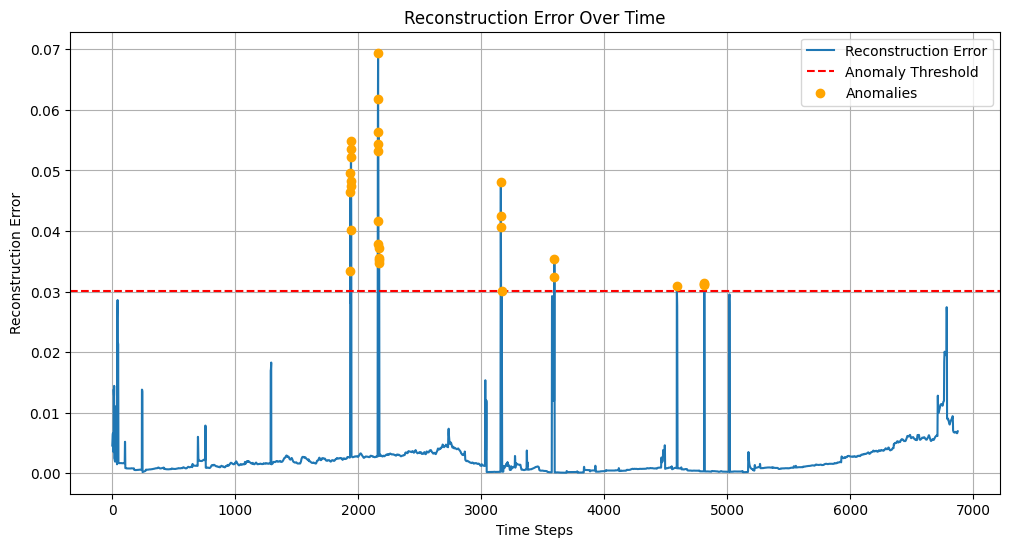

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from keras.losses import mean_squared_error

# Prepare Data for LSTM with a sliding window
def prepare_data(df, time_steps):
    X = []
    for i in range(len(df) - time_steps):
        X.append(df[i:i + time_steps])
    return np.array(X)

# Define LSTM Autoencoder Model
def create_lstm_autoencoder(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(RepeatVector(input_shape[0]))
    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))
    model.compile(optimizer='adam', loss=mean_squared_error)
    return model

# Parameters
time_steps = 5  # Number of time steps for LSTM

# Prepare training data
X = prepare_data(data_scaled1, time_steps)

# Train/Test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]

# Train LSTM Autoencoder Model
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_lstm_autoencoder(input_shape)
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Save the model
model.save('constant_anomaly_detector1.h5')

# Load the trained model
model = load_model('constant_anomaly_detector1.h5')

# Prepare historical data (same as during training)
X_historical = prepare_data(data_scaled1, time_steps)

# Predict/Reconstruct historical data using the trained model
X_historical_pred = model.predict(X_historical)

# Calculate the reconstruction error for each time step
reconstruction_errors = np.mean(np.square(X_historical - X_historical_pred), axis=(1, 2))

# Set a dynamic threshold for anomaly detection
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Adjust the threshold sensitivity by changing `k`
k = 7 # Lower value of k to make it more sensitive to deviations in constant data
threshold = mean_error + k * std_error

# Identify anomalies where reconstruction error exceeds the threshold
anomalies = reconstruction_errors > threshold
anomaly_indices = np.where(anomalies)[0]
row_numbers = anomaly_indices + time_steps

# Print detected anomalies
print(f"Anomalies detected at these row numbers (original data): {row_numbers}")
print(f"Total number of anomalies: {len(anomaly_indices)}")

# Plot reconstruction errors with the threshold
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors, label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices, reconstruction_errors[anomaly_indices], color='orange', label='Anomalies', zorder=5)
# plt.title('Reconstruction Error Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Time', fontsize=14)
plt.xlabel('Time Steps', fontsize=12, fontweight='bold')
plt.ylabel('Reconstruction Error', fontsize=12, fontweight='bold')
plt.legend()
plt.grid()
plt.show()


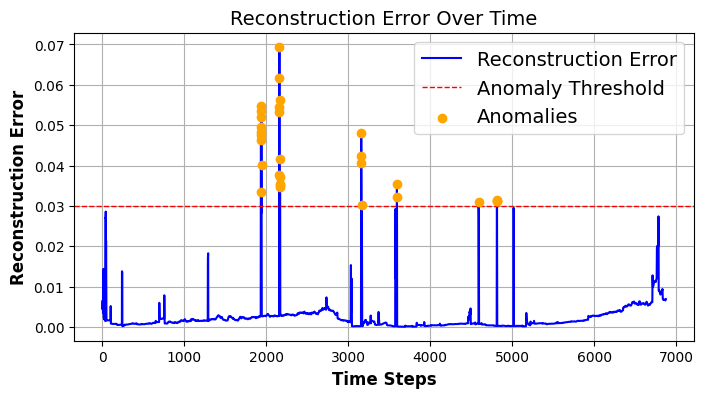

In [41]:
import matplotlib.pyplot as plt

# Plot reconstruction errors with the threshold
plt.figure(figsize=(8, 4))  # Keep the figure size

# Plot Reconstruction Errors
plt.plot(reconstruction_errors, label='Reconstruction Error', linewidth=01.5, color='blue')

# Draw Threshold Line
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1, label='Anomaly Threshold')

# Highlight Anomalies
plt.scatter(anomaly_indices, reconstruction_errors[anomaly_indices],
            color='orange', label='Anomalies', zorder=5)

# Improve Labels & Title
plt.title('Reconstruction Error Over Time', fontsize=14)
plt.xlabel('Time Steps', fontsize=12, fontweight='bold')
plt.ylabel('Reconstruction Error', fontsize=12, fontweight='bold')


# Improve Legend Position & Size
plt.legend(fontsize=14, loc='upper right')

# Add Grid with Transparency
plt.grid()

# Show the plot
plt.show()


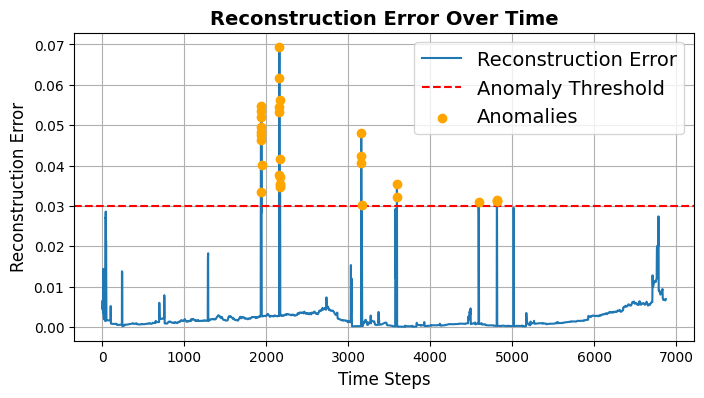

In [47]:

# Plot reconstruction errors with the threshold
plt.figure(figsize=(8, 4))
plt.plot(reconstruction_errors, label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices, reconstruction_errors[anomaly_indices], color='orange', label='Anomalies', zorder=5)
# plt.title('Reconstruction Error Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.legend(fontsize=14, loc='upper right')
plt.grid()
plt.show()

In [44]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

if df2 is not None:  # Ensure df is not None before proceeding
    df2 = df2.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
    if 'Time' in df2.columns:
      df2.drop(columns=['Time'], inplace=True)
    # Preprocess the data
    scaler = MinMaxScaler()
    data_scaled2 = scaler.fit_transform(df2)

    # Display the scaled data
    print("Scaled Data:")
    print(data_scaled2)
else:
    print("Failed to fetch data from Google Sheets.")

# Prepare Data for LSTM
def prepare_data(df, time_steps):
    X = []
    for i in range(len(df) - time_steps):
        X.append(df[i:i + time_steps])
    return np.array(X)

# Parameters
time_steps = 5 # Number of time steps used previously for LSTM

# Prepare the new dataset
X_new = prepare_data(data_scaled2, time_steps)  # Use the new scaled dataset

# Load the pre-trained model
model = load_model('constant_anomaly_detector1.h5')

model.compile(optimizer='adam', loss=mean_squared_error)


# Further train the model on the new data
# If you want to keep part of it for validation, split it accordingly
model.fit(X_new, X_new, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Save the model again after additional training
model.save('livestock_anomaly_detector_updated1.h5')

print("Model further trained on the new dataset and saved.")


Scaled Data:
[[0.5158652  0.47400028 0.37183883 ... 0.85290815 0.24000655 0.62620552]
 [0.51277756 0.47573591 0.36469496 ... 0.86121716 0.24000655 0.62620552]
 [0.60087374 0.08931547 0.9029147  ... 0.78980463 0.24000655 0.62620552]
 ...
 [0.50160951 0.47170925 0.50135734 ... 0.37053672 0.22051114 0.55902893]
 [0.5192813  0.4677173  0.36598085 ... 0.37008758 0.22051114 0.55902893]
 [0.5087702  0.45324215 0.49842835 ... 0.36806647 0.22051114 0.55902893]]
Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.0164e-04 - val_loss: 0.0033
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.9311e-04 - val_loss: 0.0036
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6378e-04 - val_loss: 0.0037
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.8604e-04 - val_loss: 0.0036
Epoch 7/5

Model further trained on the new dataset and saved.


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Anomalies detected at these row numbers (original data): [5851 5867 5880 5881 5882 5883 5898 5899 5900 5924 5925 5926 5927 5928
 6124 6125 6126 6468 6469 6470 6471 6473 6476 6477 6540 6541 6542 6543
 6544 6545 6547 7216 7217 7218 7227 7228 7229 7230 7231 7232 7233 7234
 7235 7236 7237 7238 7239]
Total number of anomalies: 47


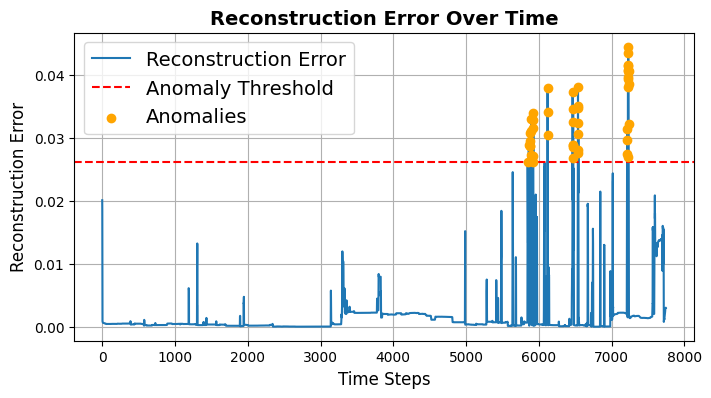

In [50]:
X_new_pred = model.predict(X_new)

# Calculate the reconstruction error for each time step
reconstruction_errors2 = np.mean(np.square(X_new - X_new_pred), axis=(1, 2))

# Set a dynamic threshold for anomaly detection based on reconstruction error
mean_error2 = np.mean(reconstruction_errors)
std_error2 = np.std(reconstruction_errors)

# Adjust 'k' for sensitivity (higher = fewer anomalies, lower = more anomalies)
k = 6  # Change k as per the sensitivity you want
threshold2 = mean_error2 + k * std_error2

# Identify anomalies (points where reconstruction error exceeds the threshold)
anomalies2 = reconstruction_errors2 > threshold2

# Show anomaly locations
anomaly_indices2 = np.where(anomalies2)[0]
row_numbers2 = anomaly_indices2 + time_steps  # Adjust for original data indices

# Print detected anomalies
print(f"Anomalies detected at these row numbers (original data): {row_numbers2}")
print(f"Total number of anomalies: {len(anomaly_indices2)}")

# Visualize reconstruction errors with the anomaly threshold
plt.figure(figsize=(8, 4))
plt.plot(reconstruction_errors2, label='Reconstruction Error')
plt.axhline(y=threshold2, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices2, reconstruction_errors2[anomaly_indices2], color='orange', label='Anomalies', zorder=5)



# Plot reconstruction errors with the threshold
# plt.title('Reconstruction Error Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.legend(fontsize=14, loc='upper left')
plt.grid()
plt.show()


In [51]:
df2

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Temp,Temp,Longitude
0,0.25,0.50,-9.48,-0.07,0.06,0.04,38.02,29.863625,77.901710
1,-0.69,1.00,-10.48,-0.06,0.03,0.03,38.39,29.863625,77.901710
2,26.13,-110.32,64.86,27.50,-0.48,0.27,35.21,29.863625,77.901710
3,5.87,-4.36,5.18,-1.31,-1.59,0.02,39.42,29.863625,77.901710
4,8.47,-3.88,4.84,-0.03,-0.10,0.04,38.17,29.863625,77.901710
...,...,...,...,...,...,...,...,...,...
7746,-4.08,-0.15,8.62,-0.02,-0.07,0.05,16.66,29.863506,77.901508
7747,-4.10,-0.15,8.62,-0.02,-0.07,0.04,16.59,29.863506,77.901508
7748,-4.09,-0.16,8.65,-0.02,-0.07,0.04,16.54,29.863506,77.901508
7749,1.29,-1.31,-10.30,-0.21,0.03,0.28,16.52,29.863506,77.901508


In [52]:
df3

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Temp,Latitude,Longitude
0,26/09/2024 01:52:46,1.5,7.9,-5.49,-0.02,-0.1,0.04,29.94,29.866751,77.900126
1,26/09/2024 01:53:00,1.61,7.92,-5.36,-0.02,-0.05,0.04,30.03,29.866751,77.900126
2,26/09/2024 01:53:16,1.85,7.91,-5.37,-0.05,-0.05,0.04,29.97,29.866751,77.900126
3,26/09/2024 01:54:00,0.88,8.39,-5.35,-0.15,-0.08,0.04,30.07,29.866751,77.900126
4,26/09/2024 01:54:15,1.03,8.42,-4.68,-0.02,-0.07,0.04,30.02,29.866751,77.900126
...,...,...,...,...,...,...,...,...,...,...
1274,31/01/2025 21:59:45,-5.68,7.13,2.05,0.1,-0.03,-0.04,22.48,29.863085,77.900378
1275,31/01/2025 21:59:59,-6,6.93,1.77,0.1,-0.03,-0.03,22.59,29.863085,77.900378
1276,31/01/2025 22:00:13,-6.13,6.85,1.65,0.1,-0.03,-0.03,22.71,29.863085,77.900378
1277,31/01/2025 22:00:27,-6.22,6.8,1.57,0.1,-0.03,-0.03,22.8,29.863085,77.900378


In [53]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras.losses import mean_squared_error  # Import mean_squared_error


if df3 is not None:  # Ensure df3 is not None before proceeding
    df3 = df3.apply(pd.to_numeric, errors='coerce')  # Convert to numeric

    if 'Time' in df3.columns:  # Check for 'Time' column in df3 (not df2)
        df3.drop(columns=['Time'], inplace=True)

    # Replace NaNs with column means instead of dropping all data
    df3.fillna(df3.mean(), inplace=True)

    # Ensure df3 has valid data
    if df3.empty:
        print("Error: No valid data available for scaling. Exiting.")
        exit()

    # Make sure df3 has the same number of columns as the original training data
    # Assuming original training data (df2) has 9 features after dropping 'Time'
    if df3.shape[1] != 9:
        print(f"Error: df3 has {df3.shape[1]} features, but the model expects 9. Exiting.")
        exit()

    # Preprocess the data
    scaler = MinMaxScaler()
    data_scaled3 = scaler.fit_transform(df3)

    # Display the scaled data
    print("Scaled Data:")
    print(data_scaled3)

    # Prepare Data for LSTM
    def prepare_data(df, time_steps):
        X = []
        for i in range(len(df) - time_steps):
            X.append(df[i:i + time_steps])
        return np.array(X)

    # Parameters
    time_steps = 5  # Number of time steps used previously for LSTM

    # Prepare the new dataset
    X_new2 = prepare_data(data_scaled3, time_steps)  # Use the new scaled dataset

    # Load the pre-trained model
    model = load_model('livestock_anomaly_detector_updated1.h5')
    model.compile(optimizer='adam', loss=mean_squared_error)  # Compile with mean_squared_error
    model.fit(X_new2, X_new2, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

    # Save the model again after additional training
    model.save('livestock_anomaly_detector_updated2.h5')

    print("Model further trained on the new dataset and saved.")
else:
    print("Failed to fetch data from Google Sheets.")

Scaled Data:
[[0.95944465 0.94349079 0.14995167 ... 0.60641399 0.82013423 0.17480469]
 [0.96078431 0.94374139 0.15152247 ... 0.61166181 0.82013423 0.17480469]
 [0.96370722 0.94361609 0.15140164 ... 0.60816327 0.82013423 0.17480469]
 ...
 [0.86652052 0.93033454 0.23622523 ... 0.18483965 0.         0.29785156]
 [0.86542443 0.92970806 0.23525858 ... 0.19008746 0.         0.29785156]
 [0.8597004  0.9273274  0.219913   ... 0.19533528 0.         0.29785156]]
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0246 - val_loss: 0.0163
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0091
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0088
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0087
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0086
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━

Model further trained on the new dataset and saved.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Anomalies detected at these row numbers (original data): [  69   70   71  834  835  836 1251 1252 1253 1254 1265 1267 1268 1269
 1270 1271 1272 1273 1274 1275 1276 1277 1278]
Total number of anomalies: 23


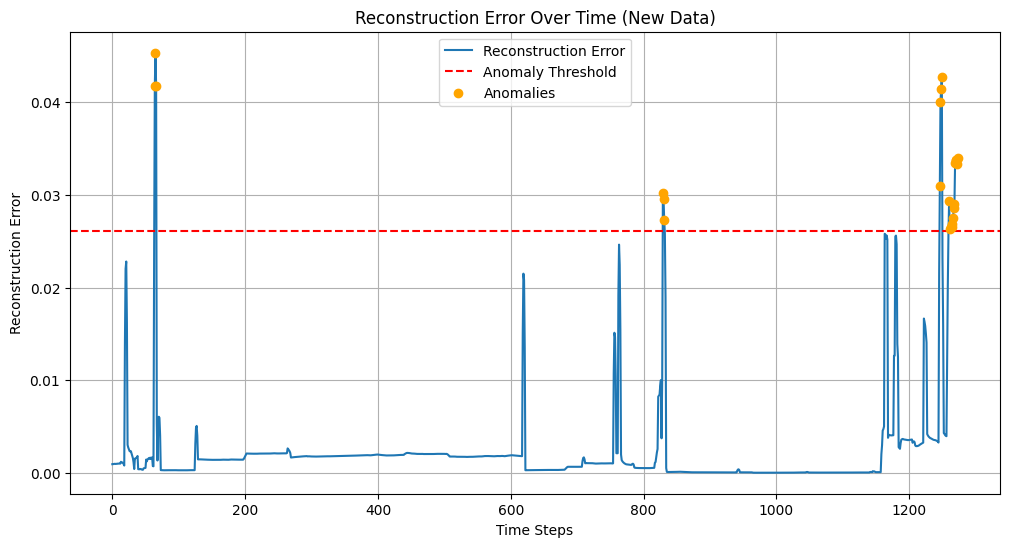

In [55]:
X_new_pred = model.predict(X_new2)

# Calculate the reconstruction error for each time step
reconstruction_errors2 = np.mean(np.square(X_new2 - X_new_pred), axis=(1, 2))

# Set a dynamic threshold for anomaly detection based on reconstruction error
mean_error2 = np.mean(reconstruction_errors)
std_error2 = np.std(reconstruction_errors)

# Adjust 'k' for sensitivity (higher = fewer anomalies, lower = more anomalies)
k = 6  # Change k as per the sensitivity you want
threshold2 = mean_error2 + k * std_error2

# Identify anomalies (points where reconstruction error exceeds the threshold)
anomalies2 = reconstruction_errors2 > threshold2

# Show anomaly locations
anomaly_indices2 = np.where(anomalies2)[0]
row_numbers2 = anomaly_indices2 + time_steps  # Adjust for original data indices

# Print detected anomalies
print(f"Anomalies detected at these row numbers (original data): {row_numbers2}")
print(f"Total number of anomalies: {len(anomaly_indices2)}")

# Visualize reconstruction errors with the anomaly threshold
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors2, label='Reconstruction Error')
plt.axhline(y=threshold2, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices2, reconstruction_errors2[anomaly_indices2], color='orange', label='Anomalies', zorder=5)
plt.title('Reconstruction Error Over Time (New Data)')
plt.xlabel('Time Steps')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid()
plt.show()



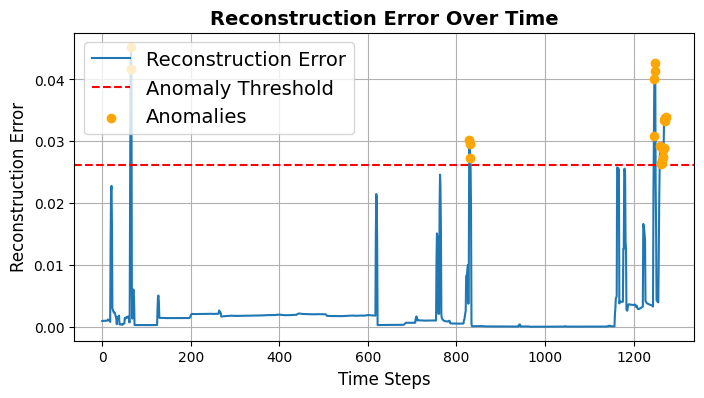

In [57]:
if df4 is not None:  # Ensure df is not None before proceeding
    df4 = df4.apply(pd.to_numeric, errors='coerce')  # Convert to numeric
    df4.drop(columns = ['Time'], inplace = True)
    # Preprocess the data
    scaler = MinMaxScaler()
    data_scaled4 = scaler.fit_transform(df4)

    # Display the scaled data
    print("Scaled Data:")
    print(data_scaled4)
else:
    print("Failed to fetch data from Google Sheets.")


# Prepare Data for LSTM
def prepare_data(df, time_steps):
    X = []
    for i in range(len(df) - time_steps):
        X.append(df[i:i + time_steps])
    return np.array(X)

# Parameters
time_steps = 5 # Number of time steps used previously for LSTM

# Prepare the new dataset
X_new3 = prepare_data(data_scaled4, time_steps)  # Use the new scaled dataset

# Load the pre-trained model
model = load_model('livestock_anomaly_detector_updated2.h5')

model.compile(optimizer='adam', loss=mean_squared_error)


# Further train the model on the new data
# If you want to keep part of it for validation, split it accordingly
model.fit(X_new3, X_new3, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Save the model again after additional training
model.save('livestock_anomaly_detector_updated3.h5')

print("Model further trained on the new dataset and saved.")


Scaled Data:
[[0.50377659 0.49920837 0.2111126  ... 0.62295082 0.69010989 0.88583815]
 [0.50702312 0.50839816 0.20305999 ... 0.69025022 0.69010989 0.88583815]
 [0.50619492 0.50715908 0.1991679  ... 0.7230371  0.69010989 0.88583815]
 ...
 [0.49191678 0.45928271 0.19473896 ... 0.12510785 0.         0.41040462]
 [0.49483204 0.45969574 0.20064421 ... 0.17773943 0.         0.41040462]
 [0.48986285 0.46234598 0.21755469 ... 0.20448663 0.         0.41040462]]
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0417 - val_loss: 0.0168
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0358 - val_loss: 0.0100
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0043
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_loss: 0.0012
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 8.3332e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━

Model further trained on the new dataset and saved.


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Anomalies detected at these row numbers (original data): [226 227 228 229 230 231 232 233 244 245 246 247 248 253 254 255 256 257
 258 259 260 261 550 551 552 553 554]
Total number of anomalies: 27


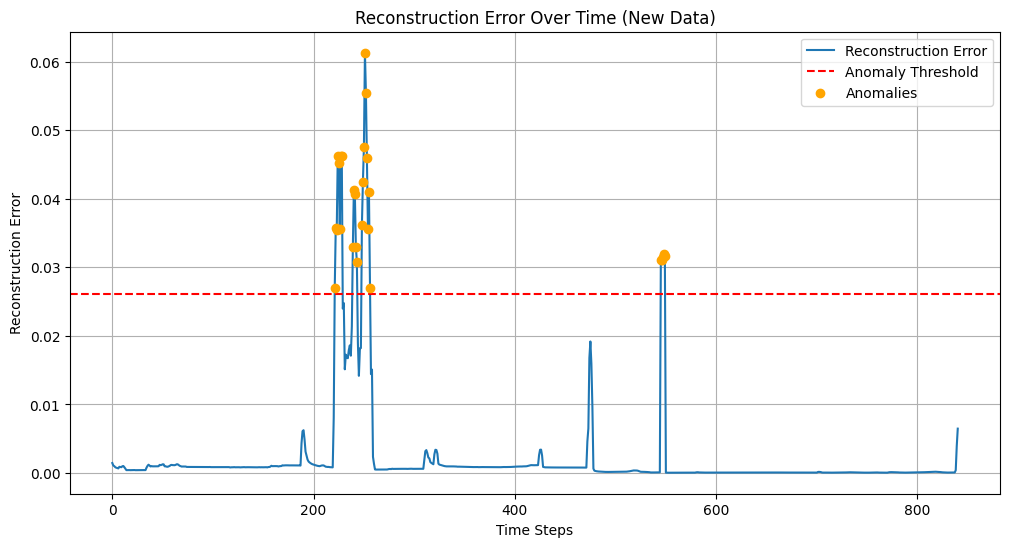

In [58]:
X_new_pred = model.predict(X_new3)

# Calculate the reconstruction error for each time step
reconstruction_errors2 = np.mean(np.square(X_new3 - X_new_pred), axis=(1, 2))

# Set a dynamic threshold for anomaly detection based on reconstruction error
mean_error2 = np.mean(reconstruction_errors)
std_error2 = np.std(reconstruction_errors)

# Adjust 'k' for sensitivity (higher = fewer anomalies, lower = more anomalies)
k = 6  # Change k as per the sensitivity you want
threshold2 = mean_error2 + k * std_error2

# Identify anomalies (points where reconstruction error exceeds the threshold)
anomalies2 = reconstruction_errors2 > threshold2

# Show anomaly locations
anomaly_indices2 = np.where(anomalies2)[0]
row_numbers2 = anomaly_indices2 + time_steps  # Adjust for original data indices

# Print detected anomalies
print(f"Anomalies detected at these row numbers (original data): {row_numbers2}")
print(f"Total number of anomalies: {len(anomaly_indices2)}")

# Visualize reconstruction errors with the anomaly threshold
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors2, label='Reconstruction Error')
plt.axhline(y=threshold2, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices2, reconstruction_errors2[anomaly_indices2], color='orange', label='Anomalies', zorder=5)
plt.title('Reconstruction Error Over Time (New Data)')
plt.xlabel('Time Steps')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid()
plt.show()


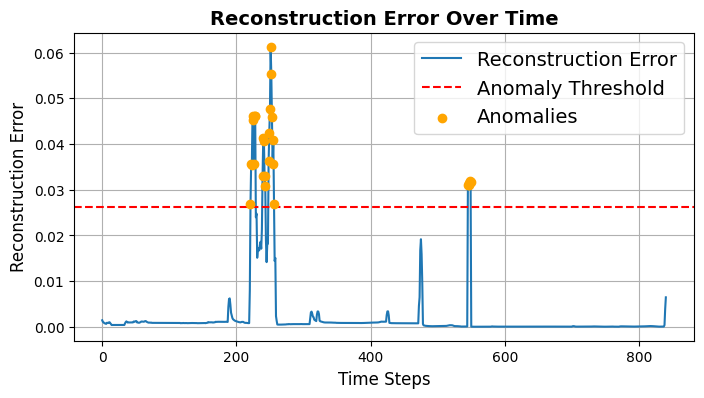

In [64]:

# Visualize reconstruction errors with the anomaly threshold
plt.figure(figsize=(8, 4))
plt.plot(reconstruction_errors2, label='Reconstruction Error')
plt.axhline(y=threshold2, color='red', linestyle='--', label='Anomaly Threshold')
plt.scatter(anomaly_indices2, reconstruction_errors2[anomaly_indices2], color='orange', label='Anomalies', zorder=5)



# Plot reconstruction errors with the threshold
# plt.title('Reconstruction Error Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.legend(fontsize=14, loc='upper right')
plt.grid()
plt.show()


In [65]:
model.save('/content/drive/MyDrive/livestock_anomaly_detector_updated4.h5')
